# Species Richness
##
## Step 1: Load Coral Cover Data

**Purpose:**
Load the preprocessed coral cover data for species richness calculation.

**Input:**
* `processed_stony_coral.csv` (from "C:\Users\vijai\Desktop\Florida" directory)

**Output:**
* A Pandas DataFrame containing the coral cover data.

**Analysis Steps:**
1.  Load the `processed_stony_coral.csv` file into a Pandas DataFrame.
2.  Display the first 5 rows of the DataFrame.

In [13]:
import pandas as pd
import os

# Define the directory containing the processed data
data_dir = "C:\\Users\\vijai\\Desktop\\Florida"  # Update this if your directory is different

# Load the coral cover data
coral_df = pd.read_csv(os.path.join(data_dir, "processed_stony_coral.csv"))

# Display the first 5 rows
print(coral_df.head())

# Display information about the coral cover data
print(coral_df.info())

   OID_  year               Date Subregion Habitat  SiteID     SiteName  \
0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   

   StationID Surveyed_all_years  points  ...  Porites_porites_complex  \
0        101                  N     479  ...                      0.0   
1        102                  N     525  ...                      0.0   
2        103                  N     558  ...                      0.0   
3        104                  N     446  ...                      0.0   
4        111                  N     450  ...                      0.0   

   Pseudodiploria_clivosa  Pseudodiploria_strigosa  Scleractinia  Scolymia_sp  \
0                     0.0    

## Step 2: Calculate Species Richness

**Purpose:**
Calculate species richness for each sample (row) in the coral cover data.

**Input:**
* Pandas DataFrame `coral_df` (from Step 1)

**Output:**
* The `coral_df` DataFrame with an added 'Species_Richness' column.

**Analysis Steps:**
1.  Identify the columns in `coral_df` that represent coral species (i.e., the columns containing coral cover information). These are typically the columns with names like 'Acropora_cervicornis', 'Montastraea_cavernosa', etc.
2.  For each row in `coral_df`:
    * Count the number of species columns where the coral cover value is greater than 0.  This assumes that a value greater than 0 indicates the presence of that species.
3.  Store this count as the 'Species_Richness' for that row.
4.  Display the first 5 rows of `coral_df` with the new 'Species_Richness' column.

In [14]:
# Identify coral species columns
species_columns = [
    col for col in coral_df.columns
    if pd.api.types.is_numeric_dtype(coral_df[col]) and col not in ['OID_', 'year', 'SiteID', 'StationID', 'points']
]

# Calculate species richness
coral_df['Species_Richness'] = (coral_df[species_columns] > 0).sum(axis=1)

# Display the first 5 rows with the Species_Richness column
print(coral_df[['year', 'SiteName', 'Habitat', 'Species_Richness'] + species_columns].head())

# Display information about the updated coral_df
print(coral_df.info())

   year     SiteName Habitat  Species_Richness  Acropora_cervicornis  \
0  1996  Rattlesnake      HB                 0                   0.0   
1  1996  Rattlesnake      HB                 0                   0.0   
2  1996  Rattlesnake      HB                 0                   0.0   
3  1996  Rattlesnake      HB                 0                   0.0   
4  1996   El Radabob      HB                 0                   0.0   

   Acropora_palmata  Agaricia_fragilis  Agaricia_lamarcki  \
0               0.0                0.0                0.0   
1               0.0                0.0                0.0   
2               0.0                0.0                0.0   
3               0.0                0.0                0.0   
4               0.0                0.0                0.0   

   Cladocora_arbuscula  Colpophyllia_natans  ...  Porites_porites_complex  \
0                  0.0                  0.0  ...                      0.0   
1                  0.0                  0.0  .

## Step 3: Analyze and Visualize Annual Species Richness Trends

**Purpose:**
Analyze and visualize how species richness changes over time (annually).

**Input:**
* Pandas DataFrame `coral_df` (from Step 2)

**Output:**
* A Pandas DataFrame showing the mean species richness for each year.
* A line plot visualizing the annual mean species richness.

**Analysis Steps:**
1.  Group the `coral_df` by 'year'.
2.  Calculate the mean 'Species_Richness' for each year.
3.  Reset the index to make 'year' a column in the DataFrame.
4.  Plot the annual mean species richness using a line plot, with 'year' on the x-axis and 'mean_species_richness' on the y-axis.

    year  mean_species_richness
0   1996               5.225000
1   1997               5.649351
2   1998               4.906250
3   1999               4.231250
4   2000               4.362500
5   2001               4.711712
6   2002               4.819048
7   2003               5.028571
8   2004               4.590476
9   2005               4.876190
10  2006               4.038835
11  2007               4.631068
12  2008               5.237624
13  2009               5.733945
14  2010               5.550459
15  2011               6.148649
16  2012               6.202703
17  2013               6.040541
18  2014               5.711957
19  2015               6.081250
20  2016               6.093750
21  2017               5.902597
22  2018               5.050000
23  2019               5.025000
24  2020               5.025000
25  2021               4.968750
26  2022               5.206250
27  2023               5.106250


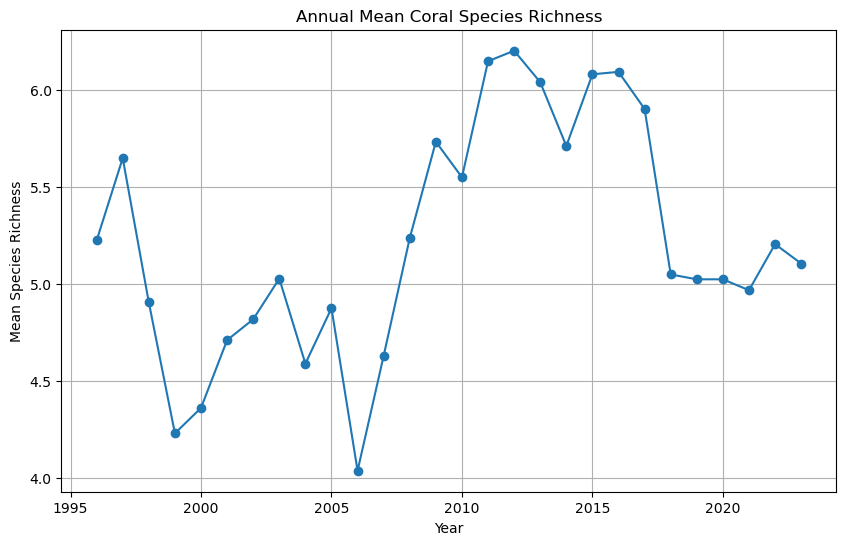

In [3]:
import matplotlib.pyplot as plt

# Calculate annual mean species richness
annual_richness = coral_df.groupby('year')['Species_Richness'].mean().reset_index(name='mean_species_richness')

# Display the annual mean species richness
print(annual_richness)

# Visualize annual species richness trend
plt.figure(figsize=(10, 6))
plt.plot(annual_richness['year'], annual_richness['mean_species_richness'], marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Species Richness')
plt.title('Annual Mean Coral Species Richness')
plt.grid(True)
plt.show()

## Step 4: Analyze and Visualize Species Richness Trends by Site

**Purpose:**
Analyze and visualize how species richness changes over time for each site.

**Input:**
* Pandas DataFrame `coral_df` (from Step 2)

**Output:**
* A Pandas DataFrame showing the mean species richness for each site and year.
* A multi-line plot visualizing species richness trends for each site over time.

**Analysis Steps:**
1.  Group the `coral_df` by both 'year' and 'SiteName'.
2.  Calculate the mean 'Species_Richness' for each year and site combination.
3.  Reset the index to make 'year' and 'SiteName' columns in the DataFrame.
4.  Create a multi-line plot using Matplotlib or Seaborn:
    * 'year' on the x-axis.
    * 'Species_Richness' on the y-axis.
    * Each line representing a different 'SiteName'.

In [22]:
import pandas as pd

#   Forcing re-creation from scratch (most robust)
site_annual_richness = coral_df.groupby(['year', 'SiteName'])['Species_Richness'].mean().reset_index()

#   EXTREME Verification
print("--- EXTREME Step 4 Verification ---")
print("Type of site_annual_richness:", type(site_annual_richness))
print("Columns:", site_annual_richness.columns)
print("First 10 rows:")
print(site_annual_richness.head(10))
print("DataFrame Info:")
site_annual_richness.info()

#   Save to a CSV (for absolute certainty)
site_annual_richness.to_csv("temp_site_annual_richness.csv", index=False)
print("Saved to temp_site_annual_richness.csv")

#   Explicitly return the DataFrame (if in a function) - unlikely issue here
#   return site_annual_richness  #   Uncomment ONLY if this is inside a function

--- EXTREME Step 4 Verification ---
Type of site_annual_richness: <class 'pandas.core.frame.DataFrame'>
Columns: Index(['year', 'SiteName', 'Species_Richness'], dtype='object')
First 10 rows:
   year           SiteName  Species_Richness
0  1996            Admiral              3.25
1  1996     Alligator Deep              3.75
2  1996  Alligator Shallow              3.50
3  1996     Carysfort Deep              7.75
4  1996  Carysfort Shallow              4.50
5  1996        Cliff Green              9.00
6  1996         Conch Deep              7.50
7  1996      Conch Shallow              3.75
8  1996       Content Keys              1.75
9  1996           Dove Key              0.25
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              1099 non-null   int64  
 1   SiteName          1099 non-null   object 
 2 

## Step 5: Statistical Test - Linear Mixed-Effects Model for Site Comparison

**Purpose:**
Perform a linear mixed-effects model analysis to compare species richness between sites, accounting for repeated measures over time.

**Input:**
* Pandas DataFrame `coral_df` (from Step 2)

**Output:**
* Results of the linear mixed-effects model, including estimates of mean species richness for each site and statistical significance of differences between sites.

**Analysis Steps:**
1.  Prepare the data: Ensure the 'SiteName', 'year', and 'Species_Richness' columns are in the `coral_df` DataFrame.
2.  Fit a linear mixed-effects model using the `statsmodels.formula.api.mixedlm` function:
    * 'Species_Richness' as the dependent variable.
    * 'SiteName' as the fixed effect (to compare mean richness across sites).
    * 'year' as a covariate (to account for temporal trends).
    * Random intercepts for 'SiteName' to account for within-site correlation over time.
3.  Print the model summary to get the results.
4.  (Optional) Perform post-hoc tests to compare specific pairs of sites if the overall model shows significant differences.

In [16]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#   Prepare Data (Ensure columns are present)
data = coral_df[['SiteName', 'year', 'Species_Richness']]

#   Fit Linear Mixed-Effects Model
try:
    model = smf.mixedlm("Species_Richness ~ C(SiteName) + year", data, groups=data["SiteName"])
    result = model.fit()

    #   Print Model Summary
    print(result.summary())

    #   Optional: Post-hoc tests (if needed - this is more complex with mixedlm directly)
    #   Post-hoc tests with mixedlm are not as straightforward as with regular ANOVA.
    #   You might need to perform pairwise comparisons manually or use other libraries.

except Exception as e:
    print(f"An error occurred during mixed-effects model fitting: {e}")

                     Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      Species_Richness
No. Observations:        3912         Method:                  REML            
No. Groups:              46           Scale:                   2.6737          
Min. group size:         26           Log-Likelihood:          -7491.4358      
Max. group size:         112          Converged:               Yes             
Mean group size:         85.0                                                  
-------------------------------------------------------------------------------
                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------
Intercept                            36.204    6.805  5.320 0.000 22.865 49.542
C(SiteName)[T.Alligator Deep]        -0.181    2.324 -0.078 0.938 -4.735  4.374
C(SiteName)[T.Alligator Shallow]     -0.905    2.323 -0.390 0

C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2262: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


## Step 6: Prepare Data for Spatial Visualization

**Purpose:**
Prepare the data by merging species richness information with site coordinates.

**Input:**
* Pandas DataFrame `annual_site_richness` (from Step 4)
* Pandas DataFrame (or CSV file) containing site coordinates (latitude and longitude)

**Output:**
* A merged Pandas DataFrame containing 'year', 'SiteName', 'Species_Richness', 'Latitude', and 'Longitude'.

**Analysis Steps:**
1.  Load the site coordinates data (if it's a CSV file) into a Pandas DataFrame.
2.  Merge the `annual_site_richness` DataFrame with the site coordinates DataFrame using 'SiteName' as the key.
3.  Display the first few rows of the merged DataFrame to ensure the data is correctly joined.

In [18]:
print(f"Is site_annual_richness defined? {'site_annual_richness' in locals() or 'site_annual_richness' in globals()}")

Is site_annual_richness defined? True


In [24]:
import pandas as pd


#   FORCE reload site_annual_richness from CSV
site_annual_richness = pd.read_csv("temp_site_annual_richness.csv")

#   FORCE reload coordinates_df and RENAME the column
coordinates_df = pd.read_csv(coordinates_file)
coordinates_df = coordinates_df.rename(columns={'Site_name': 'SiteName'})  # RENAME!

#   Verification before merge
print("--- Step 6 Verification (BEFORE Merge) ---")
print("Columns in site_annual_richness:", site_annual_richness.columns)
print("Columns in coordinates_df:", coordinates_df.columns)

#   Merge
try:
    plot_data = pd.merge(site_annual_richness, coordinates_df, on='SiteName', how='inner')
    print("Merge successful!")
except Exception as e:
    print("Merge FAILED!")
    print("Error:", e)

#   Verification after merge (if it succeeds)
if 'plot_data' in locals():
    print("--- Step 6 Verification (AFTER Merge) ---")
    print(plot_data.head())
    print(plot_data.info())

--- Step 6 Verification (BEFORE Merge) ---
Columns in site_annual_richness: Index(['year', 'SiteName', 'Species_Richness'], dtype='object')
Columns in coordinates_df: Index(['OID_', 'Region', 'Site_Code', 'SiteID', 'SiteName', 'Habitat',
       'Subregion', 'StationID', 'First_Year_surveyed', 'length_m', 'Depth_ft',
       'latDD', 'lonDD', 'latDeg', 'latMin', 'lonDeg', 'lonMin'],
      dtype='object')
Merge successful!
--- Step 6 Verification (AFTER Merge) ---
   year SiteName  Species_Richness  OID_ Region Site_Code  SiteID Habitat  \
0  1996  Admiral              3.25   101  FKNMS       9P4      33       P   
1  1996  Admiral              3.25   102  FKNMS       9P4      33       P   
2  1996  Admiral              3.25   103  FKNMS       9P4      33       P   
3  1996  Admiral              3.25   104  FKNMS       9P4      33       P   
4  1997  Admiral              4.25   101  FKNMS       9P4      33       P   

  Subregion  StationID  First_Year_surveyed  length_m  Depth_ft    latD

#   Step 7: Create Spatial Visualization

**Purpose:**
Create a map to visualize the spatial distribution of species richness.

**Input:**
* Pandas DataFrame `plot_data` (from Step 6) containing 'SiteName', 'year', 'Species_Richness', 'latDD', and 'lonDD'.

**Output:**
* A map showing the location of each site and its corresponding species richness.

**Analysis Steps:**
1.  Create a GeoDataFrame from the `plot_data` DataFrame, using the 'lonDD' and 'latDD' columns to define the geometry (points).
2.  (Optional) Load a basemap (e.g., a shapefile of the Florida Keys coastline) to provide geographical context.
3.  Plot the GeoDataFrame on the map:
    * Use 'lonDD' for the x-axis and 'latDD' for the y-axis.
    * Use 'Species_Richness' to color-code the points, so sites with higher richness have different colors.
    * Add a legend to the plot to show the color scale for species richness.
4.  Add a title and labels to the plot.
5.  Display the map.

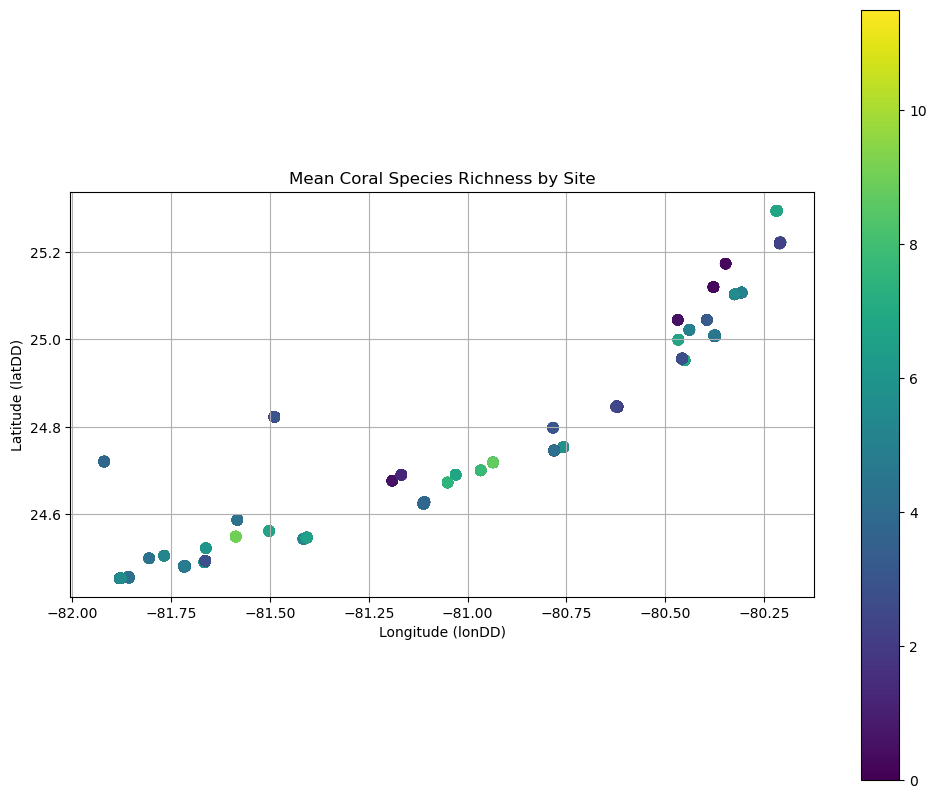

In [26]:
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point

#   1. Prepare Geometry
geometry = [Point(xy) for xy in zip(plot_data['lonDD'], plot_data['latDD'])]

basemap = None #Proceeding without basemap

#   4. Plot the Data
fig, ax = plt.subplots(figsize=(12, 10))

if basemap is not None:
    basemap.plot(ax=ax, color='lightgray')  # Plot basemap

gdf.plot(ax=ax, column='Species_Richness', cmap='viridis', legend=True, markersize=50)

#   5. Add Labels and Title
plt.title("Mean Coral Species Richness by Site")
plt.xlabel("Longitude (lonDD)")
plt.ylabel("Latitude (latDD)")
plt.grid(True)

#   6. Display the Map
plt.show()